This notebook will be used primarily for the Coursera-IBM Data Science Capstone Project.


In [45]:
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
## Since the Seattle dataset is updated frequently, I have uploaded a copy of the dataset from September 17, 2020, in order to have a stable basis for analysis. 
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
Credentials removed. 
    (Bucket='machinelearningwithpythoncapstone-donotdelete-pr-xaydtjk8mqldvq',Key='Collisions .csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)


In [3]:
# A cursory analysis of the data 
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,...,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0,0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [4]:
df.shape

(221389, 40)

In [42]:
df.columns.values

array(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [43]:
df.dtypes.value_counts()

object     23
int64      12
float64     5
dtype: int64

In [44]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
X                  213918 non-null float64
Y                  213918 non-null float64
OBJECTID           221389 non-null int64
INCKEY             221389 non-null int64
COLDETKEY          221389 non-null int64
REPORTNO           221389 non-null object
STATUS             221389 non-null object
ADDRTYPE           217677 non-null object
INTKEY             71884 non-null float64
LOCATION           216801 non-null object
EXCEPTRSNCODE      100986 non-null object
EXCEPTRSNDESC      11779 non-null object
SEVERITYCODE       221388 non-null object
SEVERITYDESC       221389 non-null object
COLLISIONTYPE      195159 non-null object
PERSONCOUNT        221389 non-null int64
PEDCOUNT           221389 non-null int64
PEDCYLCOUNT        221389 non-null int64
VEHCOUNT           221389 non-null int64
INJURIES           221389 non-null int64
SERIOUSINJURIES    221389 non-null int64
FATALITIES     

In [5]:
### There are several attributes which have no value for further analysis, let's drop them.
df1 = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'SDOT_COLCODE', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'SDOTCOLNUM'],axis=1)



In [6]:
df1.shape

(221389, 27)

In [7]:
### Overlay to original df name
df = df1

In [8]:
### Confirm original df, updated shape
df.shape

(221389, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 27 columns):
X                  213918 non-null float64
Y                  213918 non-null float64
ADDRTYPE           217677 non-null object
LOCATION           216801 non-null object
EXCEPTRSNCODE      100986 non-null object
EXCEPTRSNDESC      11779 non-null object
SEVERITYCODE       221388 non-null object
SEVERITYDESC       221389 non-null object
COLLISIONTYPE      195159 non-null object
PERSONCOUNT        221389 non-null int64
PEDCOUNT           221389 non-null int64
PEDCYLCOUNT        221389 non-null int64
VEHCOUNT           221389 non-null int64
INJURIES           221389 non-null int64
SERIOUSINJURIES    221389 non-null int64
FATALITIES         221389 non-null int64
INCDATE            221389 non-null object
INCDTTM            221389 non-null object
JUNCTIONTYPE       209417 non-null object
INATTENTIONIND     30188 non-null object
UNDERINFL          195179 non-null object
WEATHER       

Begin data evaluation and cleansing 

Severity Code 

In [10]:
df["SEVERITYCODE"].value_counts(normalize=True)*100

1     62.151517
2     26.535765
0      9.753916
2b     1.401160
3      0.157642
Name: SEVERITYCODE, dtype: float64

In [11]:
df["SEVERITYCODE"].unique()

array(['1', '0', '2', '2b', '3', nan], dtype=object)

In [12]:
df["SEVERITYCODE"].value_counts()

1     137596
2      58747
0      21594
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

In [13]:
dftemp = df[["SEVERITYCODE", "SEVERITYDESC"]]
dftemp[~(dftemp.duplicated())].style.hide_index()

SEVERITYCODE,SEVERITYDESC
1,Property Damage Only Collision
0,Unknown
2,Injury Collision
2b,Serious Injury Collision
3,Fatality Collision
nan,Unknown


In [14]:
### Replace nan SEVERITYCODEs with 0.
df["SEVERITYCODE"].fillna('0', inplace=True)

In [15]:
df["SEVERITYCODE"].value_counts()

1     137596
2      58747
0      21595
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

SEVERITYCODE = 0 shows an increase of 1 because of the single nan value.

In [16]:
dftemp = df[["SEVERITYCODE", "SEVERITYDESC"]]
dftemp[~(dftemp.duplicated())].style.hide_index()

SEVERITYCODE,SEVERITYDESC
1,Property Damage Only Collision
0,Unknown
2,Injury Collision
2b,Serious Injury Collision
3,Fatality Collision


Cases where SEVERITYCODE = 0 (Unknown) have no value in predicting our target variable of SEVERITYCODE. Let's retrieve indexes for all SEVERITYCODE == 0, and use them to delete the related rows. 

In [36]:
### Retrieve SEVERITYCODE indices
indexNames = df[df['SEVERITYCODE'] == "0"].index

In [37]:
### Use indices to drop SEVERITYCODE == 0. 
df.drop(indexNames, inplace=True)


In [38]:
df.shape

(199794, 27)

In [39]:
df["SEVERITYCODE"].value_counts()

1     137596
2      58747
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

Let's realign SEVERITYCODE values 3 --> 4, and 2b --> 4.

In [40]:
df['SEVERITYCODE'].replace('3', '4', inplace=True)
df['SEVERITYCODE'].replace('2b', '3', inplace=True)
### df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('int64')

In [41]:
df["SEVERITYCODE"].value_counts()

1    137596
2     58747
3      3102
4       349
Name: SEVERITYCODE, dtype: int64

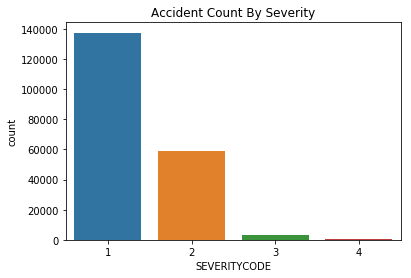

In [48]:
plt.title('Accident Count By Severity')
###ax.set(xlabel='Severity Code', ylabel='Accident Count')
sns.countplot(df['SEVERITYCODE'], data=df)

Handle blank ADDRTYPE rows

In [49]:
df["ADDRTYPE"].value_counts()

Block           129694
Intersection     67405
Alley              764
Name: ADDRTYPE, dtype: int64

In [50]:
df['ADDRTYPE'].fillna('Unknown', inplace=True)

In [52]:
df["ADDRTYPE"].value_counts()

Block           129694
Intersection     67405
Unknown           1931
Alley              764
Name: ADDRTYPE, dtype: int64

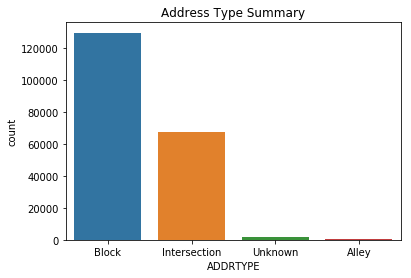

In [53]:
plt.title('Address Type Summary')
sns.countplot(df['ADDRTYPE'], data=df)

Extract month and year from INCDATE

In [54]:
df.shape

(199794, 27)

In [58]:
## Save the intermediate file to CSV
filename = "Collisions Without Severity Equals 0.csv"
df.to_csv(filename, index=False)

Convert INCDATE and INCDTTM to datetime format

In [60]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [61]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199794 entries, 0 to 221388
Data columns (total 27 columns):
X                  194389 non-null float64
Y                  194389 non-null float64
ADDRTYPE           199794 non-null object
LOCATION           197099 non-null object
EXCEPTRSNCODE      88165 non-null object
EXCEPTRSNDESC      5684 non-null object
SEVERITYCODE       199794 non-null int64
SEVERITYDESC       199794 non-null object
COLLISIONTYPE      195157 non-null object
PERSONCOUNT        199794 non-null int64
PEDCOUNT           199794 non-null int64
PEDCYLCOUNT        199794 non-null int64
VEHCOUNT           199794 non-null int64
INJURIES           199794 non-null int64
SERIOUSINJURIES    199794 non-null int64
FATALITIES         199794 non-null int64
INCDATE            199794 non-null datetime64[ns, UTC]
INCDTTM            199794 non-null datetime64[ns]
JUNCTIONTYPE       193413 non-null object
INATTENTIONIND     30188 non-null object
UNDERINFL          195177 non-null obj